# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import pprint
from citipy import citipy
from api_keys import api_key
from datetime import datetime, timezone, tzinfo, timedelta

#URL and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Output File (CSV)
outputpath=os.path.join(".","output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities=[]
countries=[]
lat_true=[]
lng_true=[]

# Create a set of random lat and lng combinations
#for x in range(1,19,1):
#    lowlim=float((90-((x-1)*10)))
#    highlim=float(((90-10)-((x-1)*10)))
#    lats = np.random.uniform(low=-lowlim, high=highlim, size=300)
#    lngs = np.random.uniform(low=-180.000, high=180.000, size=300)
#    lat_lngs.append([lats,lngs])

lats = np.random.uniform(low=-90.000, high=90.000, size=4000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=4000)
lat_lngs=zip(lats,lngs)
lat_lngs=pd.DataFrame(lat_lngs)


# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
for index, row in lat_lngs.iterrows():
    city = citipy.nearest_city(row[0], row[1]).city_name
    country = citipy.nearest_city(row[0], row[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(len(cities))
cities=pd.DataFrame(zip(cities,countries))
cities=cities.rename(columns={0:'City',1:'Country'})
cities.head()

1261


,City,Country
0,gasa,bt
1,punta arenas,cl
2,cape town,za
3,ilulissat,gl
4,kapaa,us


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
results=[]

print(f"Beginning Data Retrieval")
print(f"---------------------------")
for index,row in cities.iterrows():
    query_url=f"{url}appid={api_key}&q={row[0]},{row[1]}&units={units}"
    response=requests.get(query_url).json()
    if response['cod']==200:
        print(f"Processing record {index} | {row[0]},{row[1]}")
        fecha=str(datetime.now(timezone(timedelta(seconds=response['timezone']))))
        results.append([
            response['name'],
            response['sys']['country'],
            fecha[0:10],
            fecha[11:16],
            response['coord']['lat'],
            response['coord']['lon'],
            response['main']['temp'],
            response['main']['temp_min'],
            response['main']['temp_max'],
            response['main']['humidity'],
            response['clouds']['all'],
            response['wind']['speed'],
        ])
    else:
        print(f"City not found. Skipping...")
        
results=pd.DataFrame(results)
results=results.rename(columns={
    0:'City',
    1:'Country',
    2:'Date',
    3:'Time',
    4:'Lat',
    5:'Lon',
    6:'Temp',
    7:'Min',
    8:'Max',
    9:'Humidity',
    10:'Cloudiness',
    11:'Wind_speed'
})
print(f"---------------------------")
print(f"Data Retrieval Complete")
print(f"---------------------------")
results.head()

Beginning Data Retrieval
---------------------------
Processing record 0 | gasa,bt
Processing record 1 | punta arenas,cl
Processing record 2 | cape town,za
Processing record 3 | ilulissat,gl
Processing record 4 | kapaa,us
Processing record 5 | valverde del camino,es
Processing record 6 | khatanga,ru
Processing record 7 | bluff,nz
Processing record 8 | richards bay,za
City not found. Skipping...
Processing record 10 | atuona,pf
Processing record 11 | elko,us
Processing record 12 | ushuaia,ar
Processing record 13 | yellowknife,ca
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing record 17 | hasaki,jp
Processing record 18 | cooma,au
Processing record 19 | new norfolk,au
Processing record 20 | georgetown,sh
Processing record 21 | katsuura,jp
Processing record 22 | busselton,au
Processing record 23 | lavrentiya,ru
Processing record 24 | geraldton,au
Processing record 25 | port elizabeth,za
Processing record 26 | buala,sb
Processing record 27 | sa

Processing record 236 | torbay,ca
Processing record 237 | faanui,pf
Processing record 238 | arlit,ne
Processing record 239 | jalu,ly
Processing record 240 | carauari,br
Processing record 241 | sinop,tr
City not found. Skipping...
Processing record 243 | teknaf,bd
City not found. Skipping...
Processing record 245 | nenjiang,cn
City not found. Skipping...
Processing record 247 | victoria,sc
Processing record 248 | erzin,ru
Processing record 249 | srednekolymsk,ru
City not found. Skipping...
Processing record 251 | kodiak,us
Processing record 252 | novobelokatay,ru
Processing record 253 | zyryanka,ru
Processing record 254 | kigoma,tz
Processing record 255 | kargopol,ru
Processing record 256 | lubbock,us
Processing record 257 | ciudad real,es
Processing record 258 | dina,pk
Processing record 259 | cherskiy,ru
Processing record 260 | tocopilla,cl
City not found. Skipping...
Processing record 262 | atikokan,ca
Processing record 263 | san patricio,mx
Processing record 264 | klaksvik,fo
City n

Processing record 467 | am timan,td
City not found. Skipping...
City not found. Skipping...
Processing record 470 | yar-sale,ru
Processing record 471 | kenora,ca
Processing record 472 | codo,br
City not found. Skipping...
Processing record 474 | levelland,us
Processing record 475 | sisimiut,gl
Processing record 476 | kitimat,ca
Processing record 477 | santa cruz,cr
Processing record 478 | oranjemund,na
Processing record 479 | svetlogorsk,ru
Processing record 480 | sibu,my
Processing record 481 | kizema,ru
City not found. Skipping...
Processing record 483 | haines junction,ca
Processing record 484 | resavica,rs
Processing record 485 | grand gaube,mu
Processing record 486 | mehran,ir
City not found. Skipping...
Processing record 488 | quatre cocos,mu
Processing record 489 | dicabisagan,ph
Processing record 490 | langsa,id
Processing record 491 | yerbogachen,ru
Processing record 492 | businga,cd
Processing record 493 | malartic,ca
Processing record 494 | husavik,is
City not found. Skippin

Processing record 701 | grand-santi,gf
Processing record 702 | ngaoundere,cm
Processing record 703 | muros,es
Processing record 704 | yegorlykskaya,ru
Processing record 705 | shirokiy,ru
Processing record 706 | swellendam,za
Processing record 707 | touros,br
City not found. Skipping...
Processing record 709 | loding,no
Processing record 710 | general roca,ar
Processing record 711 | russell,nz
Processing record 712 | raudeberg,no
Processing record 713 | baruun-urt,mn
Processing record 714 | fayetteville,us
Processing record 715 | zharkent,kz
Processing record 716 | comodoro rivadavia,ar
Processing record 717 | natagaima,co
Processing record 718 | noyabrsk,ru
Processing record 719 | vanimo,pg
Processing record 720 | isiro,cd
City not found. Skipping...
Processing record 722 | seversk,ru
Processing record 723 | caconda,ao
Processing record 724 | nsoko,sz
Processing record 725 | challapata,bo
Processing record 726 | namatanai,pg
Processing record 727 | alpena,us
Processing record 728 | alg

Processing record 933 | krasnotorka,ua
Processing record 934 | ugoofaaru,mv
Processing record 935 | kuruman,za
City not found. Skipping...
Processing record 937 | krk,hr
Processing record 938 | sterling,us
Processing record 939 | lieksa,fi
Processing record 940 | ampanihy,mg
Processing record 941 | newport,us
Processing record 942 | maldonado,uy
Processing record 943 | umm kaddadah,sd
Processing record 944 | churapcha,ru
Processing record 945 | port moresby,pg
Processing record 946 | three hills,ca
Processing record 947 | sur,om
Processing record 948 | ojinaga,mx
Processing record 949 | miracema do tocantins,br
Processing record 950 | columbus,us
Processing record 951 | salinas,ec
Processing record 952 | huanren,cn
City not found. Skipping...
City not found. Skipping...
Processing record 955 | adwa,et
City not found. Skipping...
Processing record 957 | qinzhou,cn
Processing record 958 | aksarka,ru
Processing record 959 | kambove,cd
Processing record 960 | garoua boulai,cm
Processing re

Processing record 1159 | la orilla,mx
Processing record 1160 | quang ngai,vn
Processing record 1161 | ocos,gt
Processing record 1162 | oussouye,sn
Processing record 1163 | beeville,us
Processing record 1164 | cervo,es
Processing record 1165 | klyuchevskiy,ru
Processing record 1166 | carai,br
Processing record 1167 | lincoln,us
City not found. Skipping...
City not found. Skipping...
Processing record 1170 | trincomalee,lk
Processing record 1171 | triunfo,br
Processing record 1172 | bagdarin,ru
Processing record 1173 | hay river,ca
Processing record 1174 | pyapon,mm
Processing record 1175 | huangpi,cn
Processing record 1176 | changji,cn
Processing record 1177 | cravo norte,co
Processing record 1178 | mantena,br
Processing record 1179 | luganville,vu
Processing record 1180 | broken hill,au
Processing record 1181 | sioux lookout,ca
Processing record 1182 | benghazi,ly
Processing record 1183 | mabaruma,gy
Processing record 1184 | cedar city,us
Processing record 1185 | miraflores,co
Processi

,City,Country,Date,Time,Lat,Lon,Temp,Min,Max,Humidity,Cloudiness,Wind_speed
0,Gasa,BT,2019-10-10,00:16,27.91,89.73,30.65,30.65,30.65,93,88,6.88
1,Punta Arenas,CL,2019-10-09,15:16,-53.16,-70.91,48.61,46.40,50.00,53,75,51.67
2,Cape Town,ZA,2019-10-09,20:16,-33.93,18.42,55.40,53.01,57.99,62,20,12.75
3,Ilulissat,GL,2019-10-09,16:16,69.22,-51.10,32.00,32.00,32.00,62,20,4.70
4,Kapaa,US,2019-10-09,08:16,22.08,-159.32,75.67,73.00,78.80,88,1,5.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
results.to_csv(outputpath,index=False)
results.head()

,City,Country,Date,Time,Lat,Lon,Temp,Min,Max,Humidity,Cloudiness,Wind_speed
0,Gasa,BT,2019-10-10,00:16,27.91,89.73,30.65,30.65,30.65,93,88,6.88
1,Punta Arenas,CL,2019-10-09,15:16,-53.16,-70.91,48.61,46.40,50.00,53,75,51.67
2,Cape Town,ZA,2019-10-09,20:16,-33.93,18.42,55.40,53.01,57.99,62,20,12.75
3,Ilulissat,GL,2019-10-09,16:16,69.22,-51.10,32.00,32.00,32.00,62,20,4.70
4,Kapaa,US,2019-10-09,08:16,22.08,-159.32,75.67,73.00,78.80,88,1,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

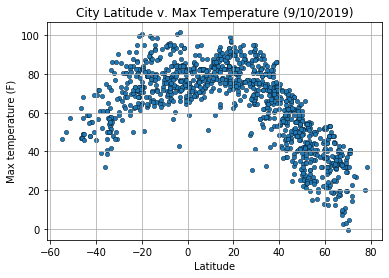

In [5]:
title=f'City Latitude v. Max Temperature ({time.localtime().tm_mday}/{time.localtime().tm_mon}/{time.localtime().tm_year})'
plt.title(title)
plt.ylabel('Max temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.scatter(results['Lat'],results['Max'],edgecolors='k', s=20, linewidths=0.35)
plt.savefig("./output_data/Max_Temperature.png")

#### Latitude vs. Humidity Plot

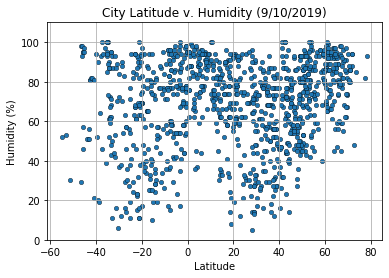

In [6]:
title=f'City Latitude v. Humidity ({time.localtime().tm_mday}/{time.localtime().tm_mon}/{time.localtime().tm_year})'
plt.title(title)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.ylim(0,110)
plt.scatter(results['Lat'],results['Humidity'],edgecolors='k', s=20, linewidths=0.35)
plt.savefig("./output_data/Humidity.png")

#### Latitude vs. Cloudiness Plot

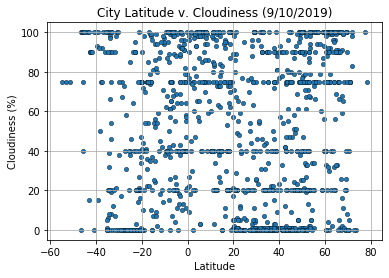

In [7]:
title=f'City Latitude v. Cloudiness ({time.localtime().tm_mday}/{time.localtime().tm_mon}/{time.localtime().tm_year})'
plt.title(title)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.scatter(results['Lat'],results['Cloudiness'],edgecolors='k', s=20, linewidths=0.35)
plt.savefig("./output_data/Cloudiness.png")

#### Latitude vs. Wind Speed Plot

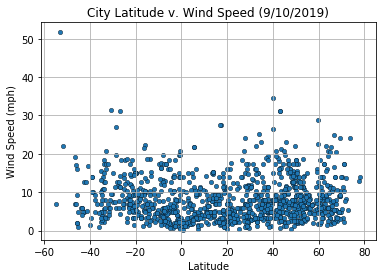

In [8]:
title=f'City Latitude v. Wind Speed ({time.localtime().tm_mday}/{time.localtime().tm_mon}/{time.localtime().tm_year})'
plt.title(title)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.scatter(results['Lat'],results['Wind_speed'],edgecolors='k', s=20, linewidths=0.35)
plt.savefig("./output_data/Wind_Speed.png")

#### Latitude vs. Temperature Range Plot

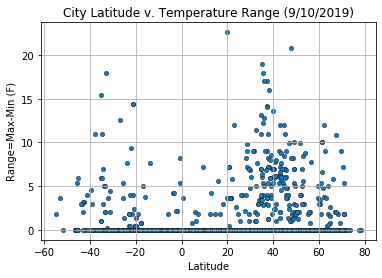

In [9]:
title=f'City Latitude v. Temperature Range ({time.localtime().tm_mday}/{time.localtime().tm_mon}/{time.localtime().tm_year})'
plt.title(title)
plt.ylabel('Range=Max-Min (F)')
plt.xlabel('Latitude')
plt.grid()
plt.scatter(results['Lat'],results['Max']-results['Min'],edgecolors='k', s=20, linewidths=0.35)
plt.savefig("./output_data/Range_Temperature.png")

## Main findings of Weather Behaviour

#### The results shown here come from a random sample of cities.


* 1. It appears to be a relation between latitude and temperatures (we use max temperatures to have uniform temperature data). In sum, the further from the equator (latutide=0) the colder the temperature tends to be.

    ![Max Temperature.png](output_data/Max_Temperature.png)

* 2. Also, temperatures appear to be more extreme in latitudes further from the equator. The range (i.e. the difference between max and min temperatures during the day) tends to increase the more north or south cities are. It should be mentioned though that many cities in all latitudes show a range equal to zero.

    ![Range Temperature.png](output_data/Range_Temperature.png)
    
* 3. Humidity tends to be closer to 100% in cities located near the equator. In general, as cities are located further from the equator, the humidity variance tends to increase. That is, in these latitudes there are cities with high levels of humidity and also cities with low levels of humidity.

    ![Humidity.png](output_data/Humidity.png)
    
* 4. Wind speed and Cloudiness do not appear to have a strong connection with latitudes. There appears to be a slight increase in wind speed in extreme latitudes though.

    ![Wind Speed.png](output_data/Wind_Speed.png) ![Cloudiness.png](output_data/Cloudiness.png) 
